In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score, roc_curve, roc_auc_score

file_path = 'https://raw.githubusercontent.com/LuckyBoy587/Advanced-ML-Techniques/master/Day1/P9/ML470_S1_HR_Data_Practice.xlsx'
df = pd.read_excel(file_path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Text(0.5, 0, 'False Positive Rate')

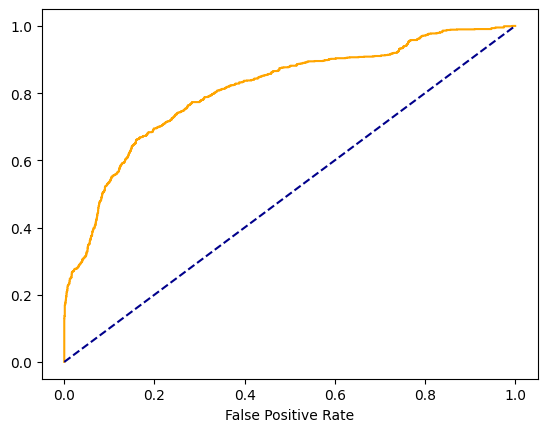

In [ ]:
x = df.drop(columns=['left'])
y = df['left']

x = pd.get_dummies(x, drop_first=True)

xtrain , xtest , ytrain , ytest = train_test_split(x , y , test_size=0.3 , random_state=42 )

classifer = GaussianNB()
classifer.fit(xtrain , ytrain)
y_pred = classifer.predict(xtest)
y_pred_prob = classifer.predict_proba(xtest)[:,1]
fpr , tpr , thresholds = roc_curve(ytest , y_pred_prob)
plt.plot(fpr , tpr , color='orange' , label='ROC')
plt.plot([0,1] , [0,1] , color='darkblue' , linestyle='--' , label='ROC curve (area = 0.5)')
plt.xlabel('False Positive Rate')